In [24]:
from math  import *
from numpy import * 
from pylab import * 

def grafico_soma(dominio, sinal):
    fig = figure(1)

    # Cria as funções a serem plotadas.
    # Plotando o sinal par + ímpar.
    a =  fig.add_subplot()
    a.stem(dominio, sinal, "k-", "ko", "k-")
    a.set_xlabel('n')
    a.set_title("$x_{par}[n] + x_{ímpar}[n]$ ")
    a.set_xticks(dominio)
    plt.show()

def grafico_impar(dominio, sinal):
    fig = plt.figure(1)

    # Cria as funções a serem plotadas.
    # Plotando o sinal par + ímpar.
    b =  fig.add_subplot()
    b.stem(dominio, sinal, "k-", "ko", "k-")
    b.set_xlabel('n')
    b.set_title("$x_{ímpar}[n]$ ")
    b.set_xticks(dominio)
    plt.show()

def grafico_par(dominio, sinal):
    fig = plt.figure(1)

    # Cria as funções a serem plotadas.
    # Plotando o sinal par + ímpar.
    par =  fig.add_subplot()
    par.stem(dominio, sinal, "k-", "ko", "k-")
    par.set_xlabel('n')
    par.set_title("$x_{par}[n]$ ")
    par.set_xticks(dominio)
    plt.show()

def grafico_original(dominio, sinal):
    fig = plt.figure(1)

    # Cria as funções a serem plotadas.
    # Plotando o sinal par + ímpar.
    original =  fig.add_subplot()
    original.stem(dominio, sinal, "k-", "ko", "k-")
    original.set_xlabel('n')
    original.set_title("$x[n]$")
    original.set_xticks(dominio)
    plt.show()

def grafico_dividido(domino, original, par, impar):
    
    # Divide a janela de plotagem em quatro regiões.
    fig, ((g1,g2),(g3,g4)) = plt.subplots(2, 2, num=10)

    g1.stem(domino, original, "k-", "ko", "k-")
    g1.set_title("$x[n]$")
    g1.set_xlabel('n')
    
    g2.stem(domino, par, "k-", "ko", "k-")
    g2.set_title("$x_{par}[n]$")
    g2.set_xlabel('n')

    g3.stem(domino, impar, "k-", "ko", "k-")
    g3.set_title("$x_{ímpar}[n]$")
    g3.set_xlabel('n')

    g4.stem(domino, (impar + par), "k-", "ko", "k-")
    g4.set_title("$x_{ímpar}[n] + x_{par}[n]$")
    g4.set_xlabel('n')

    subplots_adjust(top=1.2,hspace=0.5)
    show()

def expansao(dom_sinal, n0, sinal):
    # Série numérica calculada entre o instante inicial até
    # o instante inicial mais o tamanho do array do sinal.
    domino = range(n0, n0 + len(sinal))

    #Um array de zeros com o tamanho do dominio do sinal de entrada
    sinal_expandido = np.zeros(len(dom_sinal))

    # Extendendo o sinal, é preciso verificar se este elemento
    # existe no domínio original através de index(n). Se existir, devemos mapeá-lo
    # para o sinal expandido, caso contrário, a saída permanecerá zero.
    for i, n in enumerate(dom_sinal):
        try:
            sinal_expandido[i] = sinal[domino.index(n)]
        except ValueError:
            pass

    return sinal_expandido

def decompor_sinal(sinal, n0):
    #Calculando raio de intervalo para o domínio exendido
    raio = max(abs(n0), abs(n0 + len(sinal) - 1))
    dom_sinal = np.arange(-raio, raio+1)
    sinal_entrada = expansao(dom_sinal, n0, sinal)
    sinal_rebatido = sinal_entrada[::-1]

    sinal_par = 0.5 * (sinal_entrada + sinal_rebatido)
    sinal_impar = 0.5 * (sinal_entrada - sinal_rebatido)

    return (dom_sinal, sinal_entrada, sinal_par, sinal_impar)


# Teste 1 - Sinal ímpar

### Sinal 1: $x[n] = \sin \left(\dfrac{n\pi}{2}\right)$

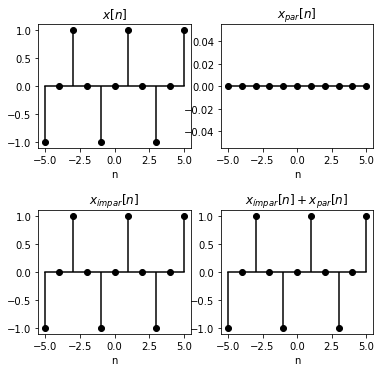

In [25]:
import numpy as np

n = np.arange(-5,6)
x = np.sin((n * np.pi)/2) #Função definida entre -5 e 5

#Intervalo inicial
n0 = n[0]
dominio, original_expandido, par, impar = decompor_sinal(x, n0)
grafico_dividido(dominio, original_expandido, par, impar)

#Pode ser plotado separadamente 
# grafico_original(dominio, original_expandido)
# grafico_par(dominio, par)
# grafico_impar(dominio, impar)
# grafico_soma(dominio, par+impar)

## Teste 2 - Sinal par

### Sinal 2: $x[n] = e^{\cos(n\pi)}$

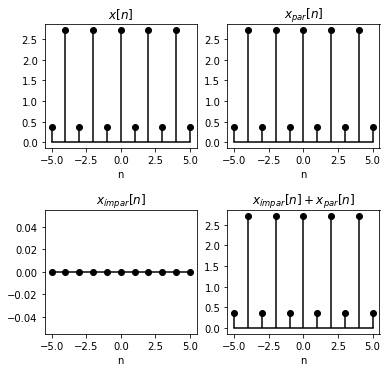

In [26]:
n = np.arange(-5,6)
x = np.exp(np.cos(n * np.pi))

n0 = n[0]

dominio, original_expandido, par, impar = decompor_sinal(x, n0)
grafico_dividido(dominio, original_expandido, par, impar)

#Pode ser plotado separadamente 
# grafico_original(dominio, original_expandido)
# grafico_par(dominio, par)
# grafico_impar(dominio, impar)
# grafico_soma(dominio, par+impar)

## Teste 3 - Sinal misto

### Sinal 3: $x[n] = \sin \left(\dfrac{n\pi}{2}\right) + e^{\cos(n\pi)}$

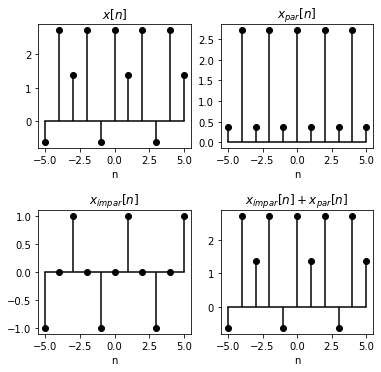

In [27]:
n = np.arange(-5,6)
x = np.sin((n * np.pi)/2) + np.exp(np.cos(n * np.pi))

n0 = n[0]

dominio, original_expandido, par, impar = decompor_sinal(x, n0)
grafico_dividido(dominio, original_expandido, par, impar)

#Pode ser plotado separadamente 
# grafico_original(dominio, original_expandido)
# grafico_par(dominio, par)
# grafico_impar(dominio, impar)
# grafico_soma(dominio, par+impar)